# Limpieza inicial de las tablas

In [1]:
import re
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score




In [2]:
# ---------------------------
# FUNCIONES AUXILIARES
# ---------------------------
def limpiar_dataframe(df):
    """Estandariza nombres de columnas y reemplaza valores nulos o inválidos."""
    df.columns = [str(col).strip().lower().replace(" ", "_") for col in df.columns]
    df.replace(["s/d", "S/D", "-", "", " "], np.nan, inplace=True)
    return df

def convertir_a_numerico(df, columnas_excluidas=[]):
    for col in df.columns:
        if col not in columnas_excluidas:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# ---------------------------
# CARGA DE DATOS
# ---------------------------

# 1. Focos de calor por jurisdicción y año
archivo = os.path.join("datasets","Cantidad de focos de calor registrados por jurisdicción y año.xlsx")
focos = pd.read_excel(archivo)
focos = limpiar_dataframe(focos)
focos = convertir_a_numerico(focos, columnas_excluidas=["jurisdicción"])

# 2. Incendios por provincia anualizados

archivo = os.path.join("datasets","Incendios por provincia.xlsx")
incendios = pd.read_excel(archivo)
incendios = limpiar_dataframe(incendios)
incendios = convertir_a_numerico(incendios, columnas_excluidas=["jurisdicción", "año"])

# 3. Estadísticas normales (múltiples hojas)
archivo = os.path.join("datasets","Estadísticas normales Datos abiertos 1991-2020- TODAS HOJAS.xlsx")
estadisticas = pd.read_excel(archivo, sheet_name=None)
estadisticas_limpias = {}
for hoja, df in estadisticas.items():
    df = limpiar_dataframe(df)
    df = convertir_a_numerico(df)
    estadisticas_limpias[hoja] = df

# 4. Densidad de población por cuenca

archivo = os.path.join("datasets","Densidad de población por cuenca.xlsx")
poblacion = pd.read_excel(archivo)
poblacion = limpiar_dataframe(poblacion)
poblacion = convertir_a_numerico(poblacion, columnas_excluidas=["provincia"])

# 5. Superficie afectada
archivo = os.path.join("datasets","Superficie afectada por incendios reportados, por jurisdicción.xlsx")
superficie_abs = pd.read_excel(archivo, sheet_name="rii_c_hectareas_incendios_prov_")
superficie_pct = pd.read_excel(archivo, sheet_name="Porcentaje de superficie afecta")

superficie_abs = limpiar_dataframe(superficie_abs)
superficie_abs = convertir_a_numerico(superficie_abs, columnas_excluidas=["jurisdicción"])

superficie_pct = limpiar_dataframe(superficie_pct)
superficie_pct["%_suma_de_hectareas"] = pd.to_numeric(superficie_pct["%_suma_de_hectareas"], errors='coerce')

# 6. Supertabla
archivo = os.path.join("datasets","Supertabla.xlsx")
supertabla = pd.read_excel(archivo, sheet_name=None)
df1 = limpiar_dataframe(supertabla['hoja1'])
df2 = limpiar_dataframe(supertabla['hoja2'])

df1 = convertir_a_numerico(df1, columnas_excluidas=["jurisdicción"])
df2 = convertir_a_numerico(df2, columnas_excluidas=["jurisdicción", "combustible"])

#7. Incendios por mes
archivo = os.path.join("datasets","Cantidad de incendios reportados por mes.xlsx")
incendios_mes = pd.read_excel(archivo)

incendios_mes = limpiar_dataframe(incendios_mes)
incendios_mes = convertir_a_numerico(incendios_mes, columnas_excluidas=["mes"])


#8. Focos por mes por jurisdiccion
archivo = os.path.join("datasets", "cantidad_focos_mes_jurisdiccion.xlsx")
focos_mes = pd.read_excel(archivo)

focos_mes = limpiar_dataframe(focos_mes)
focos_mes = convertir_a_numerico(focos_mes, columnas_excluidas=["jurisdicción"])


# ---------------------------
# REVISIÓN POST-LIMPIEZA
# ---------------------------
print("✔ Limpieza completada.")
print("Dimensiones focos:", focos.shape)
print("Dimensiones incendios:", incendios.shape)
print("Dimensiones población:", poblacion.shape)
print("Dimensiones superficie afectada:", superficie_abs.shape)
print("Dimensiones supertabla_1:", df1.shape)
print("Dimensiones supertabla_2:", df2.shape)
print("Dimensiones incendios por mes:", incendios_mes.shape)
print("Dimensiones Focos por mes:", focos_mes.shape)
incendios_mes


C:\Users\fede4\AppData\Local\Temp\ipykernel_38616\2683315024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(["s/d", "S/D", "-", "", " "], np.nan, inplace=True)
C:\Users\fede4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\fede4\AppData\Local\Temp\ipykernel_38616\2683315024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

✔ Limpieza completada.
Dimensiones focos: (24, 10)
Dimensiones incendios: (24, 11)
Dimensiones población: (24, 4)
Dimensiones superficie afectada: (24, 11)
Dimensiones supertabla_1: (1352, 6)
Dimensiones supertabla_2: (4650, 4)
Dimensiones incendios por mes: (12, 10)
Dimensiones Focos por mes: (240, 15)


C:\Users\fede4\AppData\Local\Temp\ipykernel_38616\2683315024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(["s/d", "S/D", "-", "", " "], np.nan, inplace=True)


,mes,año_2017,año_2018,año_2019,año_2020,año_2021,año_2022,año_2023,año_2024,total_años
0,Enero,183,168,125,125,79,176,253,109,1218
1,Febrero,71,134,119,83,58,133,122,340,1060
2,Marzo,17,75,58,177,74,33,95,380,909
3,Abril,2,23,20,75,19,54,22,178,393
4,Mayo,4,5,10,92,17,51,19,48,246
5,Junio,15,32,73,100,29,133,36,69,487
6,Julio,31,93,162,242,375,409,118,315,1745
7,Agosto,155,280,388,286,780,464,464,541,3358
8,Septiembre,109,194,204,191,403,496,360,467,2424
9,Octubre,103,84,130,143,316,288,448,153,1665


# Analisis exploratorio de los Datos

In [3]:
# Estilo gráfico y orden de meses
sns.set_theme(style="whitegrid", palette="OrRd")  # estilo limpio
plt.rcParams["figure.figsize"] = (10, 6)

orden_meses = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]

### Distribucion de focos de calor por jurisdiccion ( En promedio )

C:\Users\fede4\AppData\Local\Temp\ipykernel_38616\1765324587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=focos_ultimo, x=promedio_anios, y="jurisdicción", palette="Reds_r")


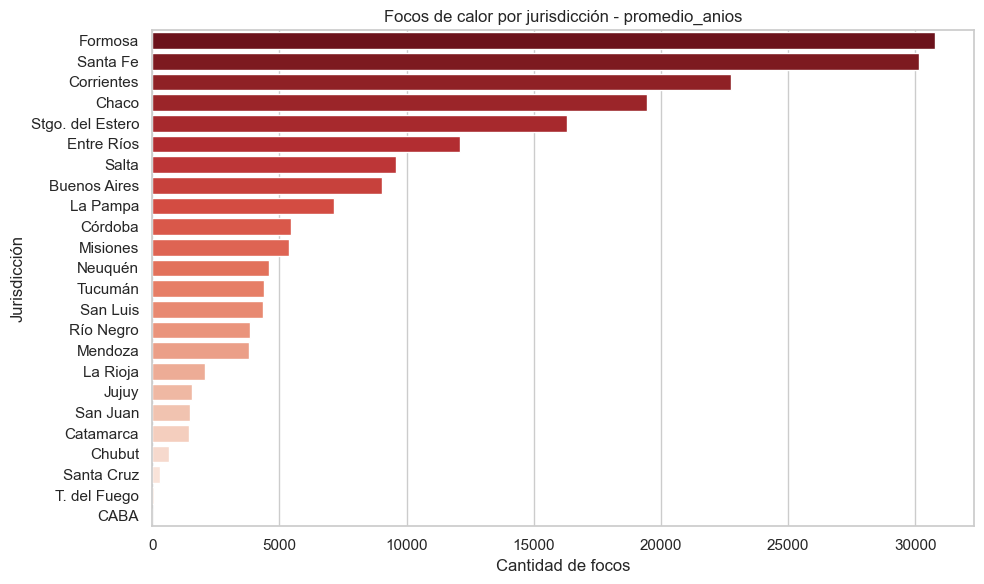

In [4]:
promedio_anios = focos.columns[-1]
focos_ultimo = focos[["jurisdicción", promedio_anios]].sort_values(by=promedio_anios, ascending=False)

plt.figure()
sns.barplot(data=focos_ultimo, x=promedio_anios, y="jurisdicción", palette="Reds_r")
plt.title(f"Focos de calor por jurisdicción - {promedio_anios}")
plt.xlabel("Cantidad de focos")
plt.ylabel("Jurisdicción")
plt.tight_layout()
plt.show()


###  Evolución temporal de focos de calor a nivel nacional

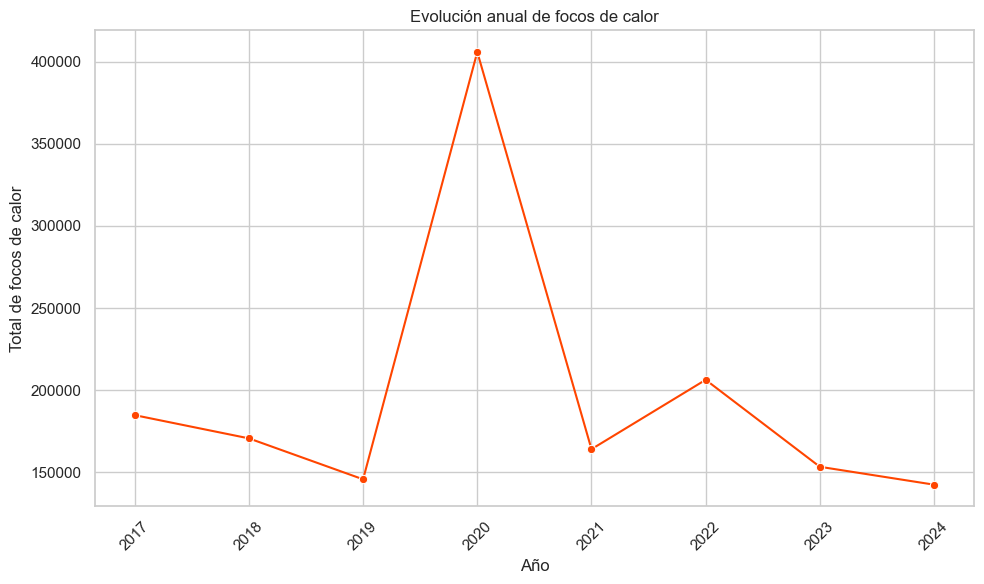

In [5]:
# Excluimos la columna "jurisdicción" y la última columna del DataFrame
columnas_a_sumar = focos.columns[1:-1]  # Seleccionamos todas las columnas excepto la primera ("jurisdicción") y la última("Promedio")

# Sumamos únicamente las columnas numéricas de los años
focos_anual = (
    focos[columnas_a_sumar]  # Nos quedamos solo con las columnas correspondientes a años
    .sum()  # Sumamos los valores por cada año
    .reset_index()  # Convertimos el índice a columna para reestructurar el DataFrame
)

# Renombramos las columnas
focos_anual.columns = ["año", "total_focos"]

# Quitamos el prefijo "año_" en caso de que los nombres contengan este prefijo
focos_anual["año"] = focos_anual["año"].str.replace("año_", "").astype(int)

# Visualizamos los resultados con Seaborn
plt.figure()
sns.lineplot(data=focos_anual, x="año", y="total_focos", marker="o", color="orangered")
plt.title("Evolución anual de focos de calor")
plt.xlabel("Año")
plt.ylabel("Total de focos de calor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Superficie afectada promedio por jurisdicción

C:\Users\fede4\AppData\Local\Temp\ipykernel_38616\4286718366.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=superficie_media.values, y=superficie_media.index, palette="YlOrBr")


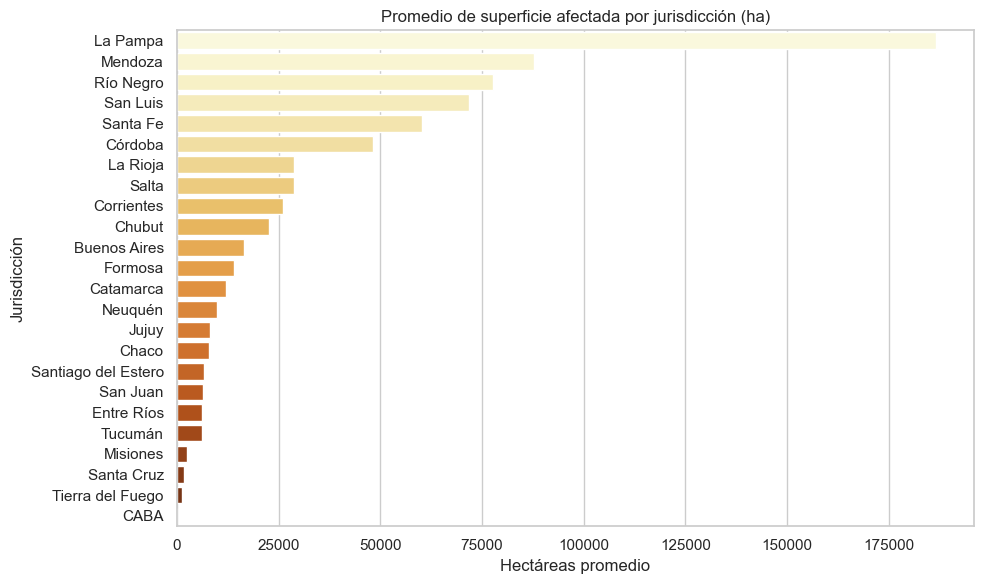

In [6]:
# Verificamos las columnas
columnas_a_promediar = superficie_abs.columns[1:-1]  # Excluimos la primera columna (jurisdicción) y la última (promedio)

# Calculamos de nuevo el promedio de superficie afectada por jurisdicción (si es necesario)
superficie_abs["promedio"] = superficie_abs[columnas_a_promediar].mean(axis=1)

# Seleccionamos la columna 'promedio' para el gráfico
superficie_media = (
    superficie_abs.set_index("jurisdicción")["promedio"]  # Usamos la columna promedio
    .sort_values(ascending=False)  # Ordenamos de mayor a menor
)

# Graficamos
plt.figure(figsize=(10, 6))
sns.barplot(x=superficie_media.values, y=superficie_media.index, palette="YlOrBr")
plt.title("Promedio de superficie afectada por jurisdicción (ha)")
plt.xlabel("Hectáreas promedio")
plt.ylabel("Jurisdicción")
plt.tight_layout()
plt.show()

### Relación entre densidad poblacional y superficie afectada (último año)

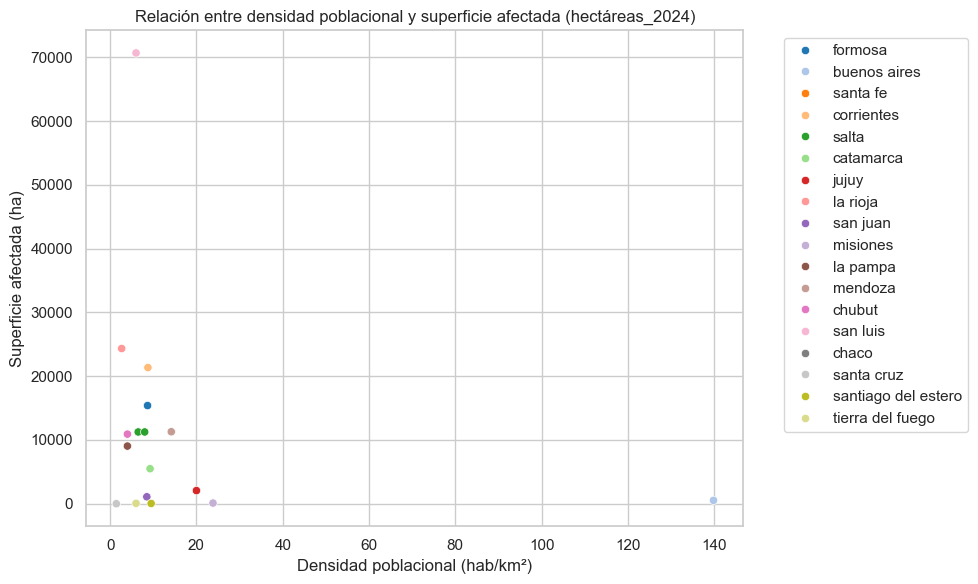

In [7]:
# (Si la columna original se llama 'provincia' en poblacion)
poblacion["jurisdicción"] = poblacion["provincia"].str.strip().str.lower()
superficie_abs["jurisdicción"] = superficie_abs["jurisdicción"].str.strip().str.lower()

df_comb = pd.merge(
    poblacion, 
    superficie_abs[["jurisdicción", superficie_abs.columns[-4]]], 
    on="jurisdicción", 
    how="inner"
)

plt.figure()
sns.scatterplot(data=df_comb, x="prom_densidad_hab_km2", y=superficie_abs.columns[-4], hue="jurisdicción", palette="tab20")
plt.title(f"Relación entre densidad poblacional y superficie afectada ({superficie_abs.columns[-4]})")
plt.xlabel("Densidad poblacional (hab/km²)")
plt.ylabel("Superficie afectada (ha)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Correlaciones profundas
* Se busca entender si hay relación estadística entre:

    🔥 Focos de calor

    🧯 Incendios reportados

    🌾 Superficie afectada

    👥 Densidad poblacional

### Preparacion de la tabla

In [8]:
cols_focos = [c for c in focos.columns if c.startswith("año_") or c.isdigit()]
cols_inc = [c for c in incendios.columns if c.startswith("año_") or c.isdigit()]
cols_sup = [c for c in superficie_abs.columns if c.startswith("hectáreas_") or c.isdigit()]
cols_focos_mes = [c for c in focos_mes.columns if c in orden_meses]
cols_inc_mes = [c for c in incendios_mes.columns if c.startswith("año_") or c.isdigit()]

In [9]:
focos["focos_prom"] = focos[cols_focos].mean(axis=1)
incendios["incendios_prom"] = incendios[cols_inc].mean(axis=1)
superficie_abs = superficie_abs.rename(columns={"promedio": "superficie_afectada_prom"})


### Normalizacion de clave jurisdiccion

In [10]:
# Diccionario para normalizar nombres de jurisdicciones
normalizacion_jurisdicciones = {
    "cordoba": "córdoba",
    "entre rios": "entre ríos",
    "neuquen": "neuquén",
    "rio negro": "río negro",
    "tucuman": "tucumán",
    "stgo. del estero": "santiago del estero",
    "t. del fuego": "tierra del fuego"
}


In [11]:
def normalizar_jurisdicciones(df):
    df["jurisdicción"] = df["jurisdicción"].str.strip().str.lower()
    df["jurisdicción"] = df["jurisdicción"].replace(normalizacion_jurisdicciones)
    return df

# Aplicar a todos los DataFrames
focos = normalizar_jurisdicciones(focos)
incendios = normalizar_jurisdicciones(incendios)
superficie_abs = normalizar_jurisdicciones(superficie_abs)
poblacion = normalizar_jurisdicciones(poblacion)


In [12]:
df_corr = focos[["jurisdicción", "focos_prom"]].merge(
    incendios[["jurisdicción", "incendios_prom"]], on="jurisdicción", how="inner"
).merge(
    superficie_abs[["jurisdicción", "superficie_afectada_prom"]], on="jurisdicción", how="inner"
).merge(
    poblacion[["jurisdicción", "prom_densidad_hab_km2"]], on="jurisdicción", how="left"
)
# Eliminar filas con NaN en variables críticas:
df_corr = df_corr.dropna(subset=["focos_prom", "incendios_prom", "superficie_afectada_prom", "prom_densidad_hab_km2"])


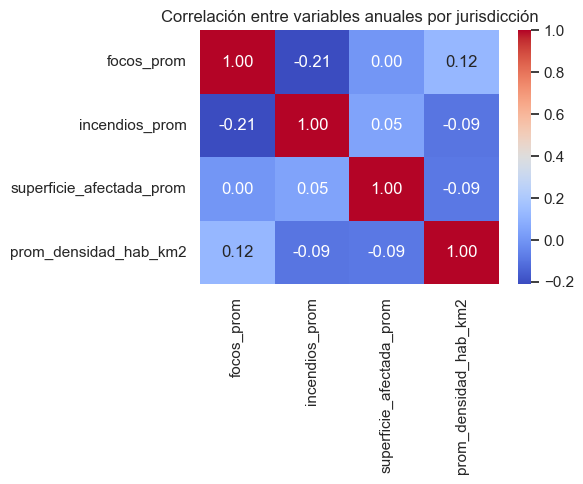

In [13]:
corr_mat = df_corr.drop(columns="jurisdicción").corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación entre variables anuales por jurisdicción")
plt.tight_layout()
plt.show()


In [14]:
# Melt con columnas ya filtradas por año (definidas antes)
focos_largo = focos.melt(id_vars="jurisdicción", value_vars=cols_focos, var_name="año", value_name="cantidad_focos")
focos_largo["año"] = focos_largo["año"].apply(lambda x: int(re.search(r"\d{4}", x).group()))

incendios_largo = incendios.melt(id_vars="jurisdicción", value_vars=cols_inc, var_name="año", value_name="cantidad_incendios")
incendios_largo["año"] = incendios_largo["año"].apply(lambda x: int(re.search(r"\d{4}", x).group()))

superficie_largo = superficie_abs.melt(id_vars="jurisdicción", value_vars=cols_sup, var_name="año", value_name="superficie_afectada")
superficie_largo["año"] = superficie_largo["año"].apply(lambda x: int(re.search(r"\d{4}", x).group()))


In [15]:
df_ja = focos_largo.merge(incendios_largo, on=["jurisdicción","año"], how="inner") \
                   .merge(superficie_largo, on=["jurisdicción","año"], how="inner") \
                   .merge(poblacion[["jurisdicción","prom_densidad_hab_km2"]], on="jurisdicción", how="left")
df_ja = df_ja.dropna(subset=["cantidad_focos","cantidad_incendios","superficie_afectada","prom_densidad_hab_km2"])


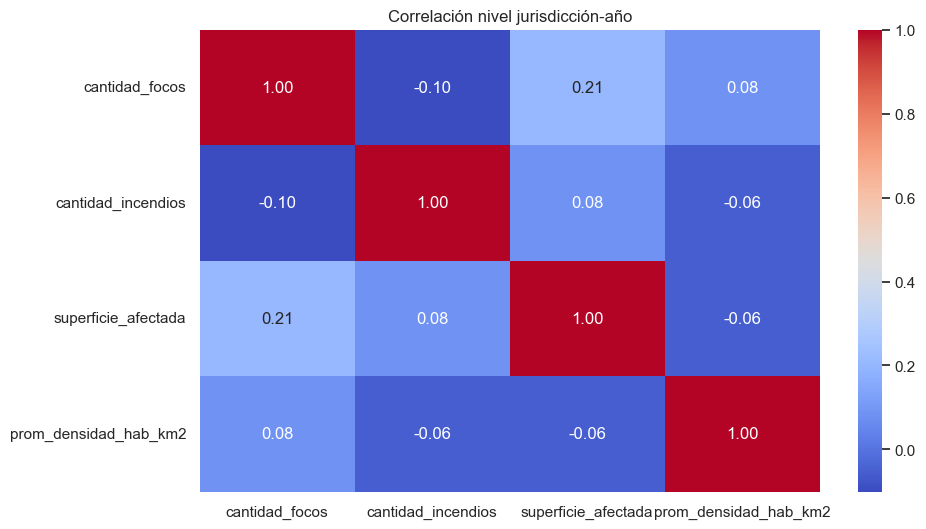

In [16]:
corr_mat2 = df_ja[["cantidad_focos","cantidad_incendios","superficie_afectada","prom_densidad_hab_km2"]].corr()
sns.heatmap(corr_mat2, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación nivel jurisdicción-año")
plt.show()


# Visualización estacional de incendios
* Objetivo: detectar meses con mayor promedio de incendios y patrones de estacionalidad.

### Enfoque Estacional Nacional

In [17]:
#Convertir a formato largo
df_inc_nac = incendios_mes.melt(id_vars="mes", value_vars=cols_inc_mes, var_name="año", value_name="cantidad")

#Normalizar mes

df_inc_nac["mes"] = df_inc_nac["mes"].str.lower()

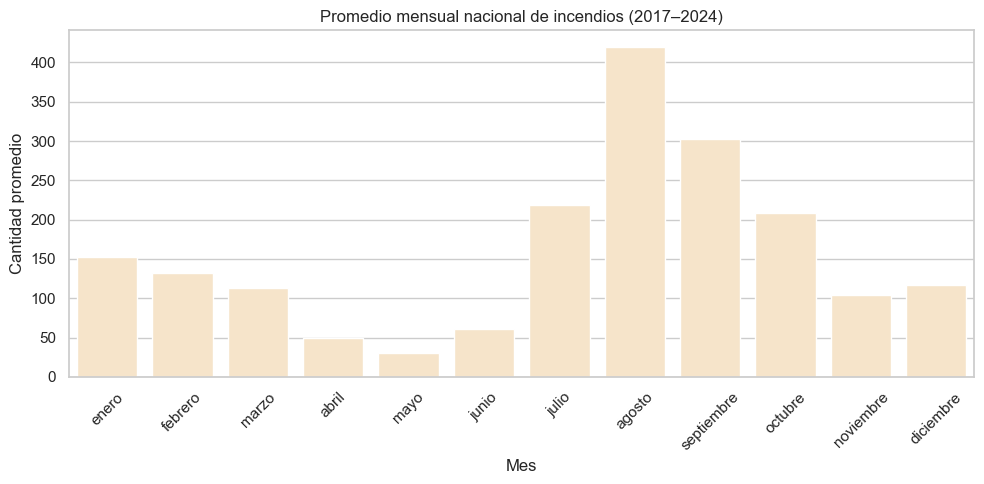

In [18]:
#Promedio mensual nacional
prom_nacional = df_inc_nac.groupby("mes")["cantidad"].mean().reindex(orden_meses).reset_index()

#Grafico de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=prom_nacional, x="mes", y="cantidad")
plt.title("Promedio mensual nacional de incendios (2017–2024)")
plt.xticks(rotation=45)
plt.ylabel("Cantidad promedio")
plt.xlabel("Mes")
plt.tight_layout()
plt.show()

### Enfoque Estacional Provincial (Proxy)

In [19]:
#Convertir a formato largo
df_focos_largo = focos_mes.melt(id_vars=["jurisdicción","año"], value_vars=cols_focos_mes,var_name="mes",value_name="cantidad_focos")

#Normalizar nombres de provincias 
df_focos_largo = normalizar_jurisdicciones(df_focos_largo)

df_focos_largo["mes"] = df_focos_largo["mes"].str.lower()

In [20]:
# Promedio mensual por jurisdicción
prom_focos_jur = (
    df_focos_largo.groupby(["jurisdicción", "mes"])["cantidad_focos"]
    .mean()
    .reset_index()
)

# Ordenar meses para visualización
prom_focos_jur["mes"] = pd.Categorical(prom_focos_jur["mes"], categories=orden_meses, ordered=True)
prom_focos_jur = prom_focos_jur.sort_values(["jurisdicción", "mes"])


! Ayuda de interpretacion: Por no contar con el dataset apropiado ( incendios por mes por jurisdiccion) y teniendo en cuenta que la correlacion
de incendios con focos es baja aprox -0.20, este analisis debe ser tratado con cuidado, ya que los valores pueden no ser representativos y solo sirven como una aproximacion.

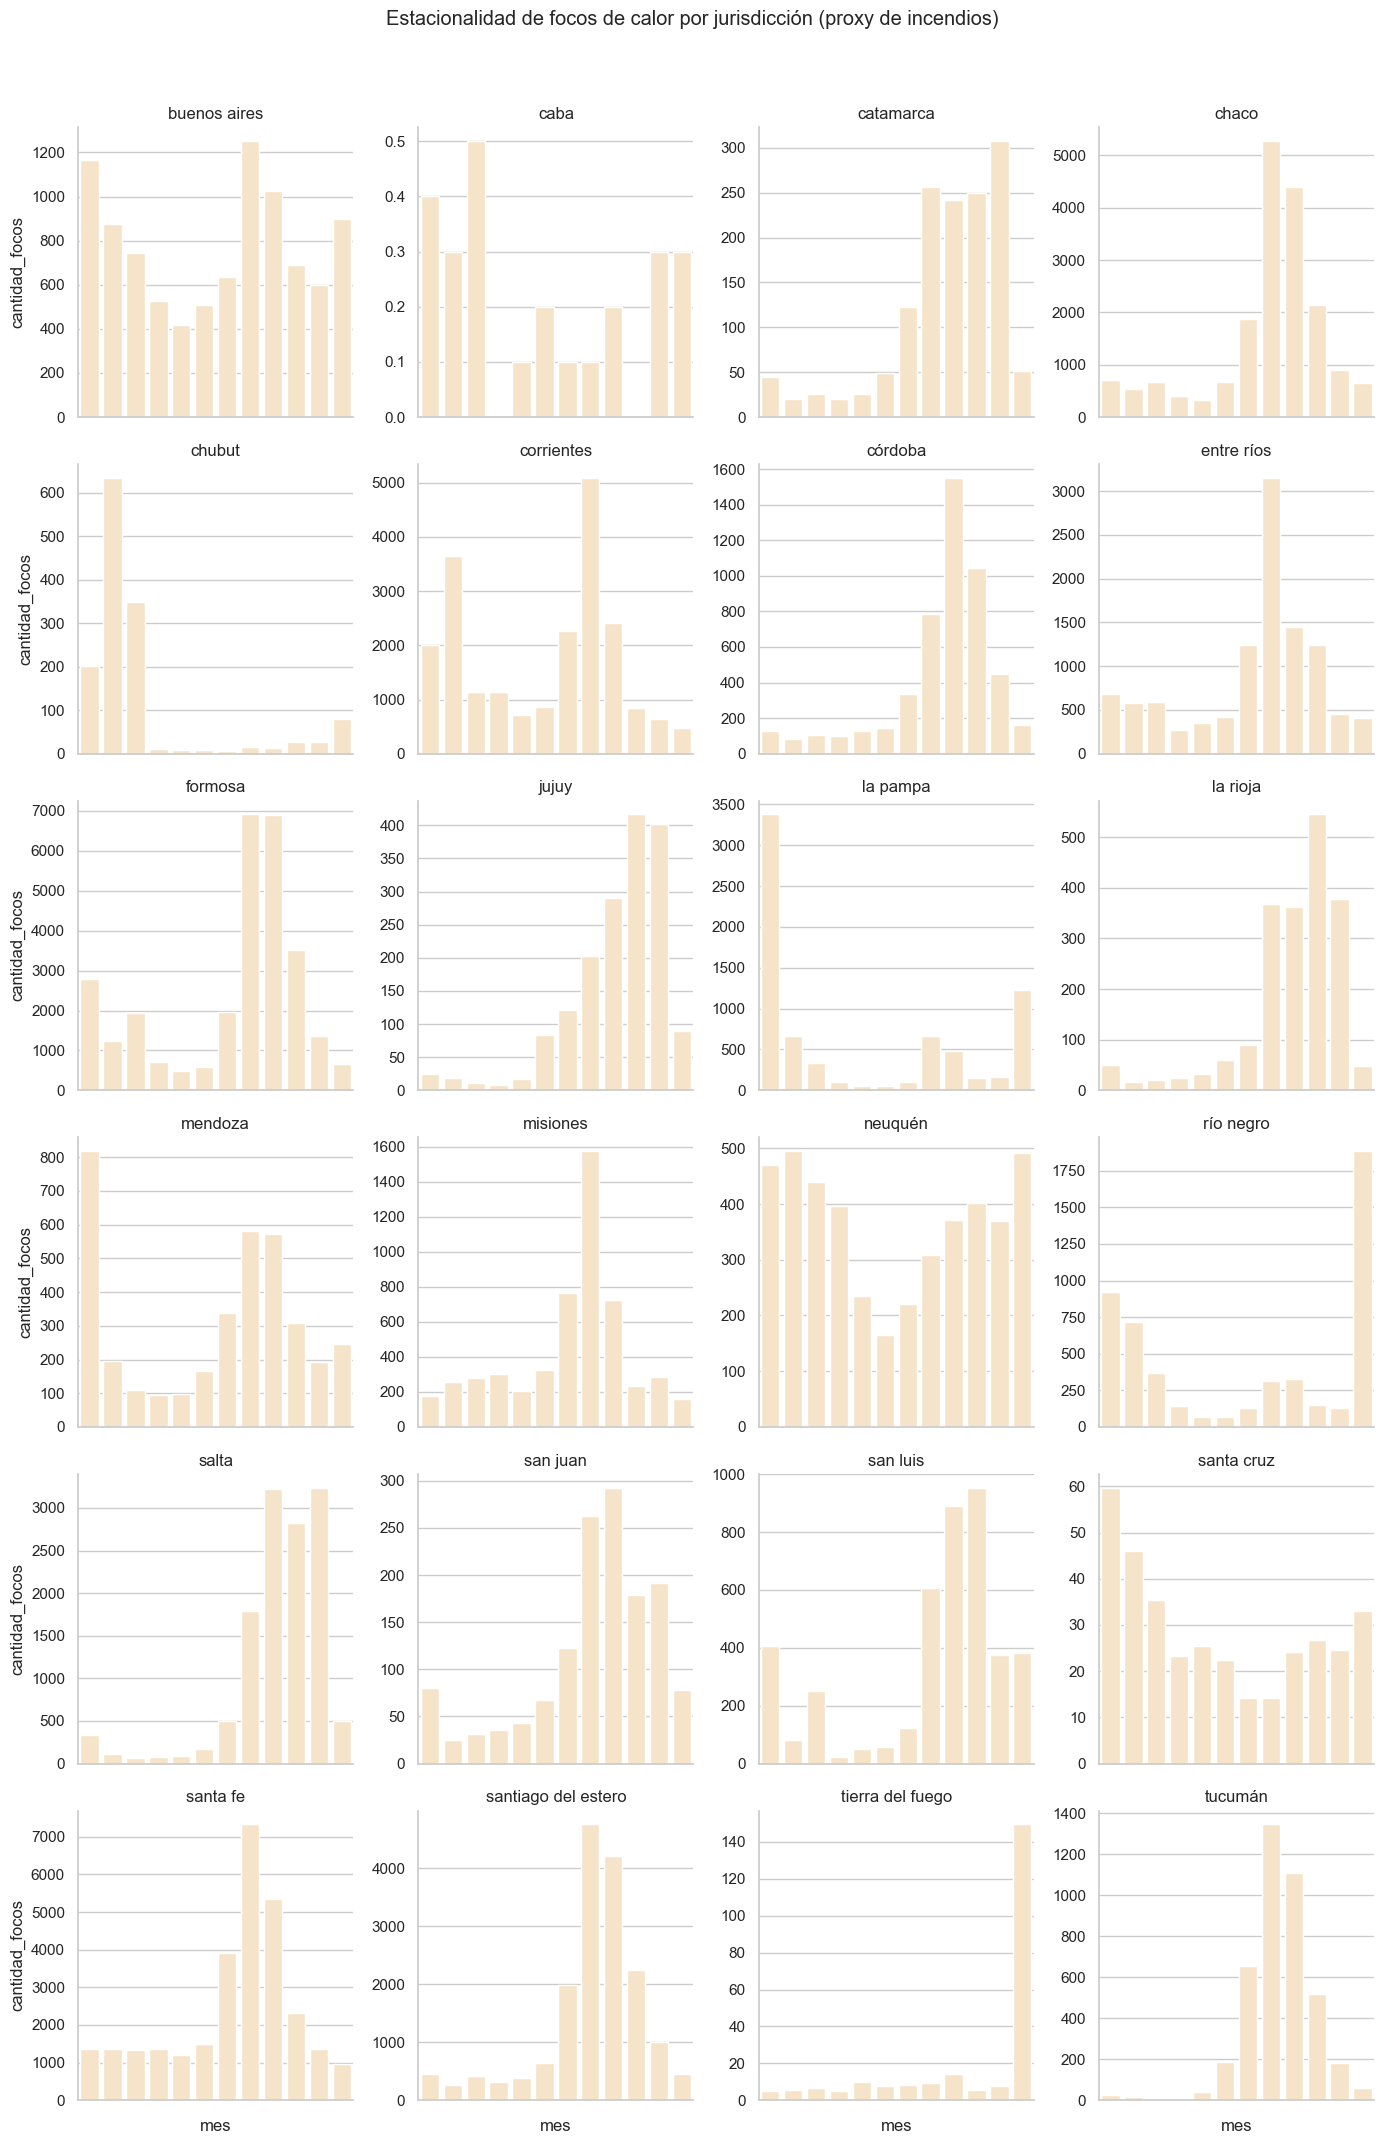

In [21]:
# Gráfico múltiple: estacionalidad por provincia (proxy)
g = sns.FacetGrid(prom_focos_jur, col="jurisdicción", col_wrap=4, height=3.5, sharey=False)
g.map(sns.barplot, "mes", "cantidad_focos", order=orden_meses)
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.figure.suptitle("Estacionalidad de focos de calor por jurisdicción (proxy de incendios)", y=1.02)
plt.tight_layout()
plt.show()


In [22]:
# Mes con mayor promedio por jurisdicción (10 más altos)
mes_max_focos = (
    prom_focos_jur.loc[prom_focos_jur.groupby("jurisdicción")["cantidad_focos"].idxmax()]
    .sort_values("cantidad_focos", ascending=False)
    .reset_index(drop=True)
)

mes_max_focos.rename(columns={"mes": "mes_pico", "cantidad_focos": "focos_promedio_max"}, inplace=True)
mes_max_focos.head(10)


,jurisdicción,mes_pico,focos_promedio_max
0,santa fe,agosto,7333.4
1,formosa,agosto,6913.9
2,chaco,agosto,5270.8
3,corrientes,agosto,5093.0
4,santiago del estero,agosto,4752.9
5,la pampa,enero,3378.0
6,salta,noviembre,3237.7
7,entre ríos,agosto,3152.8
8,río negro,diciembre,1884.0
9,misiones,agosto,1574.7


In [23]:
# Obtener top 3 meses con más focos promedio por provincia
top3_focos = (
    prom_focos_jur.sort_values(["jurisdicción", "cantidad_focos"], ascending=[True, False])
    .groupby("jurisdicción")
    .head(3)
    .reset_index(drop=True)
)

# Mostrar ejemplo
top3_focos.head(9)


,jurisdicción,mes,cantidad_focos
0,buenos aires,agosto,1251.4
1,buenos aires,enero,1164.4
2,buenos aires,septiembre,1026.8
3,caba,marzo,0.5
4,caba,enero,0.4
5,caba,febrero,0.3
6,catamarca,noviembre,307.4
7,catamarca,agosto,256.6
8,catamarca,octubre,249.5


# Preparacion Para Machine Learning

In [24]:
df_ml = focos_largo.merge(incendios_largo, on=["jurisdicción", "año"], how="inner") \
                   .merge(superficie_largo, on=["jurisdicción", "año"], how="inner") \
                   .merge(poblacion[["jurisdicción", "prom_densidad_hab_km2"]], on="jurisdicción", how="left")


Feaute engineering: orden y lags

In [25]:
df_ml = df_ml.sort_values(["jurisdicción", "año"])

df_ml["focos_lag1"] = df_ml.groupby("jurisdicción")["cantidad_focos"].shift(1)
df_ml["incendios_lag1"] = df_ml.groupby("jurisdicción")["cantidad_incendios"].shift(1)

Limpieza: elimina NAs generados por lags

In [26]:
df_ml = df_ml.dropna(subset=["focos_lag1", "incendios_lag1"]).reset_index(drop=True)


In [27]:
print(df_ml.head(7))
print(df_ml.info())


   jurisdicción   año  cantidad_focos  cantidad_incendios  \
0  buenos aires  2018            9163                45.0   
1  buenos aires  2019            8286                39.0   
2  buenos aires  2020           10123                62.0   
3  buenos aires  2021           10660                39.0   
4  buenos aires  2022            9186                60.0   
5  buenos aires  2023           10570                37.0   
6  buenos aires  2024            5851                 6.0   

   superficie_afectada  prom_densidad_hab_km2  focos_lag1  incendios_lag1  
0              55036.0             139.818182      8517.0            37.0  
1              24714.0             139.818182      9163.0            45.0  
2               4643.0             139.818182      8286.0            39.0  
3               7033.0             139.818182     10123.0            62.0  
4                142.0             139.818182     10660.0            39.0  
5               4523.0             139.818182      9186

In [28]:
# Definición del target
target = "superficie_afectada"  # o "cantidad_incendios", o la columna que estés prediciendo

# Features: todas menos el target y columnas de id
features = df_ml.drop(columns=["jurisdicción", "año", target]).columns.tolist()

# Separar por año (por ejemplo, entrenamiento hasta 2018 y test desde 2019)
año_corte = 2020
train = df_ml[df_ml["año"] < año_corte].copy()
test = df_ml[df_ml["año"] >= año_corte].copy()

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


In [29]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (49, 5) (49,)
Test shape: (125, 5) (125,)


# Entrenamiento de Modelo
## Modelo 1
### Random Forest - Clasificacion de riesgo

In [30]:
#Ej: riesgo alto si mas de x incendios
umbral = 100 #ajustable
df_ml["riesgo"] = np.where(df_ml["cantidad_incendios"] >= umbral, "alto", "bajo")


In [31]:
target = "riesgo"
features = df_ml.drop(columns=["jurisdicción", "año", "superficie_afectada", "cantidad_incendios", target]).columns.tolist()

train = df_ml[df_ml["año"] < 2019]
test = df_ml[df_ml["año"] >= 2019]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [32]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


              precision    recall  f1-score   support

        alto      0.529     0.818     0.643        44
        bajo      0.902     0.698     0.787       106

    accuracy                          0.733       150
   macro avg      0.716     0.758     0.715       150
weighted avg      0.793     0.733     0.745       150



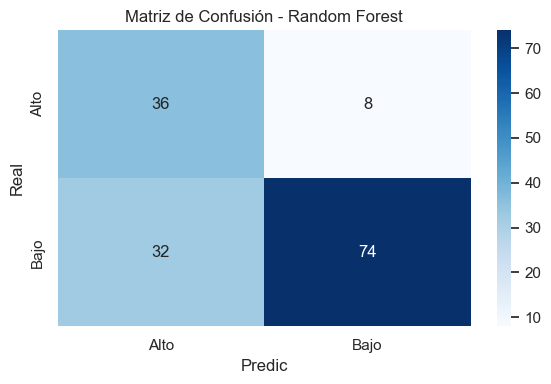

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=["alto", "bajo"])

print(classification_report(y_test, y_pred, digits=3))

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Alto", "Bajo"],
            yticklabels=["Alto", "Bajo"])
plt.xlabel("Predic")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.tight_layout()
plt.show()

## Modelo 2
### XGBoost - Regressor superficie afectada

In [34]:
# Variables
target = "superficie_afectada"
features = df_ml.drop(columns=["jurisdicción", "año", target]).columns.tolist()

# Train/Test split
train = df_ml[df_ml["año"] < 2019]
test = df_ml[df_ml["año"] >= 2019]

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Solo usar columnas numéricas
X_train = X_train.select_dtypes(include=["int64", "float64", "bool"])
X_test = X_test.select_dtypes(include=["int64", "float64", "bool"])

# Eliminar registros con NaN en X o y
train_mask = y_train.notna() & X_train.notna().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = y_test.notna() & X_test.notna().all(axis=1)
X_test = X_test[test_mask]
y_test = y_test[test_mask]

# --- Transformación logarítmica para mitigar outliers
y_train_log = np.log1p(y_train)

# Modelo
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train_log)

# Predicción en log y transformación inversa
y_pred_log = xgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

#Se puede dejar o ponerlo como parte del analisis, como hay desbalanceo extremo (16 valores en cero 3/4 del total de datos),
# El modelo no precide nada, de echo tiene un error de +72.000ha aprox 

RMSE: 72748.56661954166
R²: -2.062267285012963


Como el modelo regresivo no predice correctamente, debido a la falta de buenos datos. Se aplica un modelo de clasificacion binaria; Prediccion de grandes incendios

In [35]:
# Definir umbral para clasificación binaria
umbral = 1000  # ajusta según criterio o distribución de datos

df_ml['target_binaria'] = (df_ml['superficie_afectada'] > umbral).astype(int)


In [39]:
target_bin = 'target_binaria'
features = df_ml.drop(columns=["jurisdicción", "año", "superficie_afectada", target_bin]).select_dtypes(include=["int64", "float64", "bool"]).columns.tolist()

train = df_ml[df_ml["año"] < 2019]
test = df_ml[df_ml["año"] >= 2019]

X_train = train[features]
y_train = train[target_bin]
X_test = test[features]
y_test = test[target_bin]

# Eliminar registros con NaN en X o y
train_mask = y_train.notna() & X_train.notna().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = y_test.notna() & X_test.notna().all(axis=1)
X_test = X_test[test_mask]
y_test = y_test[test_mask]


In [56]:
os.environ["SCIPY_ARRAY_API"] = "0"

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=4)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [41]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_bal, y_train_bal)

y_pred = xgb_clf.predict(X_test)


C:\Users\fede4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [14:25:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.16      0.19      0.18        26
           1       0.81      0.78      0.80       118

    accuracy                           0.67       144
   macro avg       0.49      0.49      0.49       144
weighted avg       0.70      0.67      0.68       144



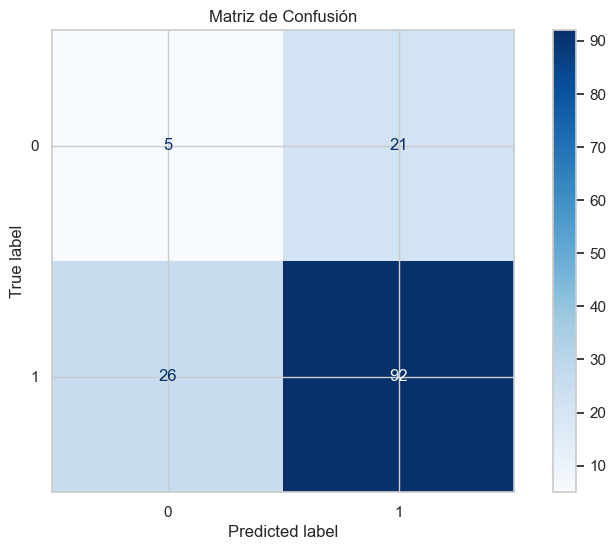

In [42]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


C:\Users\fede4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [14:26:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔎 Umbral: 0.10
              precision    recall  f1-score   support

           0       0.33      0.12      0.17        26
           1       0.83      0.95      0.89       118

    accuracy                           0.80       144
   macro avg       0.58      0.53      0.53       144
weighted avg       0.74      0.80      0.76       144



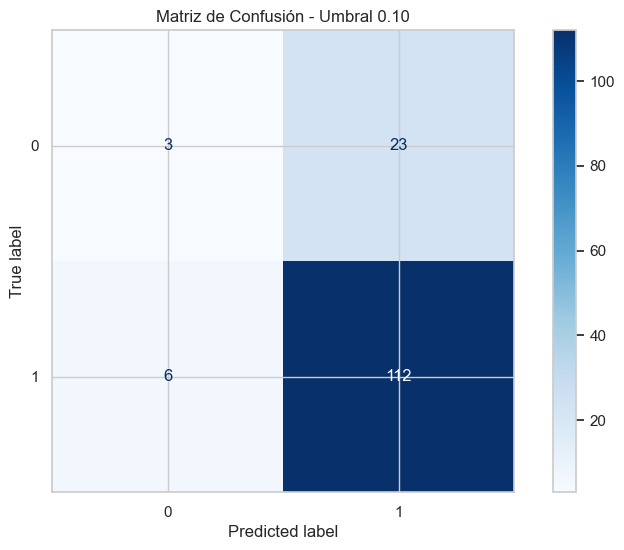


🔎 Umbral: 0.20
              precision    recall  f1-score   support

           0       0.18      0.12      0.14        26
           1       0.82      0.88      0.85       118

    accuracy                           0.74       144
   macro avg       0.50      0.50      0.49       144
weighted avg       0.70      0.74      0.72       144



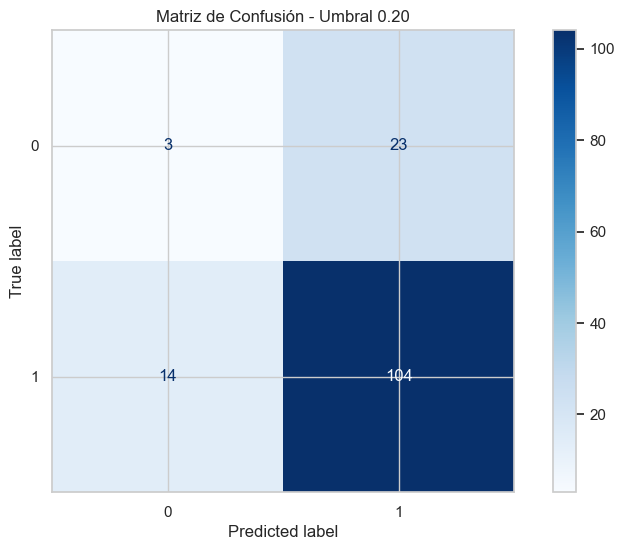


🔎 Umbral: 0.30
              precision    recall  f1-score   support

           0       0.20      0.15      0.17        26
           1       0.82      0.86      0.84       118

    accuracy                           0.74       144
   macro avg       0.51      0.51      0.51       144
weighted avg       0.71      0.74      0.72       144



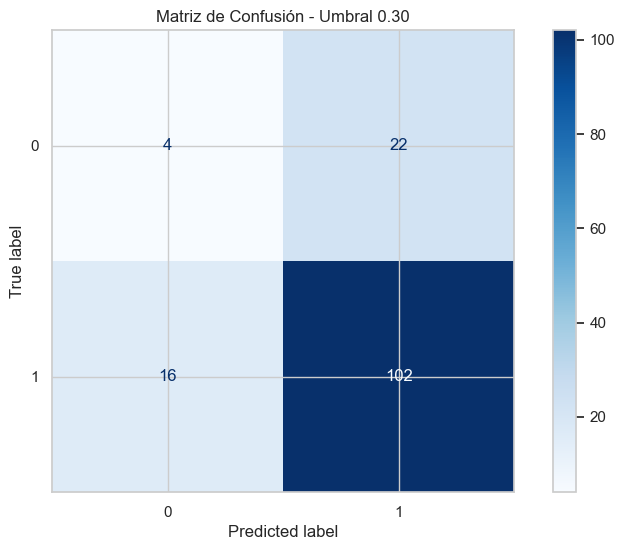


🔎 Umbral: 0.40
              precision    recall  f1-score   support

           0       0.21      0.19      0.20        26
           1       0.82      0.84      0.83       118

    accuracy                           0.72       144
   macro avg       0.52      0.52      0.52       144
weighted avg       0.71      0.72      0.72       144



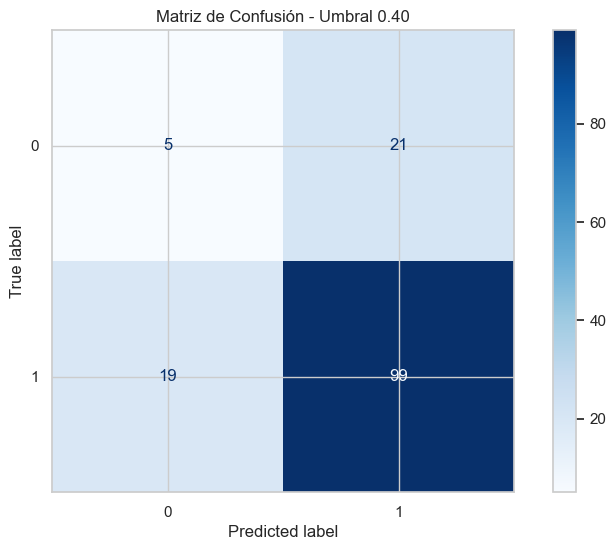


🔎 Umbral: 0.50
              precision    recall  f1-score   support

           0       0.16      0.19      0.18        26
           1       0.81      0.78      0.80       118

    accuracy                           0.67       144
   macro avg       0.49      0.49      0.49       144
weighted avg       0.70      0.67      0.68       144



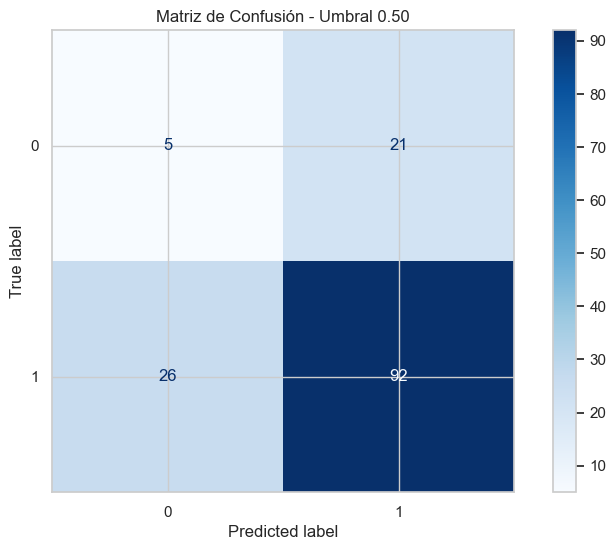


🔎 Umbral: 0.60
              precision    recall  f1-score   support

           0       0.17      0.23      0.20        26
           1       0.82      0.75      0.78       118

    accuracy                           0.66       144
   macro avg       0.49      0.49      0.49       144
weighted avg       0.70      0.66      0.68       144



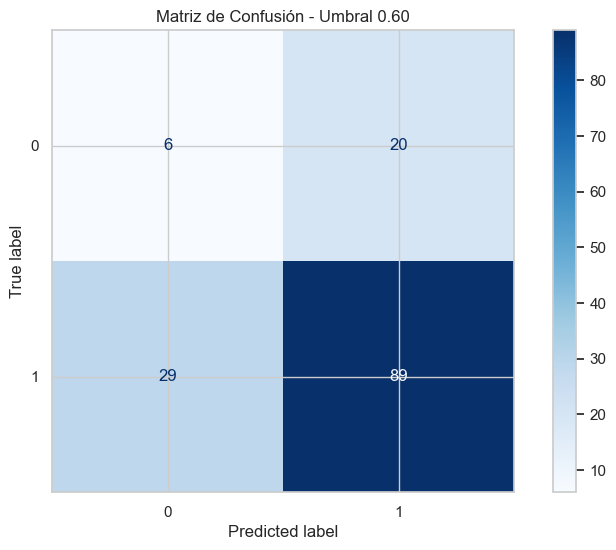


🔎 Umbral: 0.70
              precision    recall  f1-score   support

           0       0.17      0.31      0.22        26
           1       0.82      0.68      0.74       118

    accuracy                           0.61       144
   macro avg       0.50      0.49      0.48       144
weighted avg       0.70      0.61      0.65       144



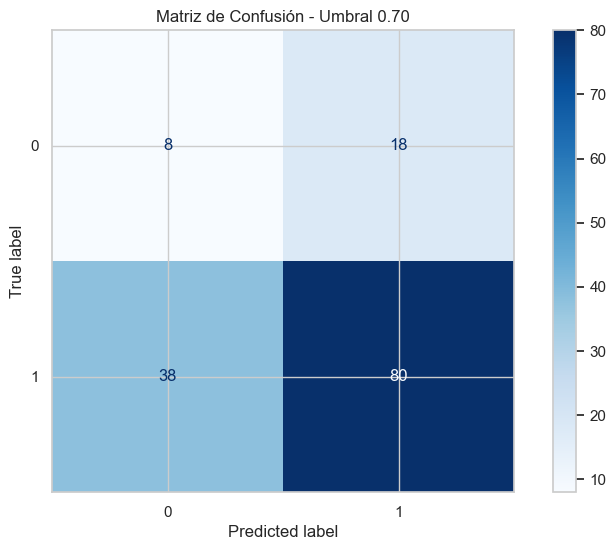


🔎 Umbral: 0.80
              precision    recall  f1-score   support

           0       0.18      0.42      0.25        26
           1       0.82      0.57      0.67       118

    accuracy                           0.54       144
   macro avg       0.50      0.50      0.46       144
weighted avg       0.70      0.54      0.59       144



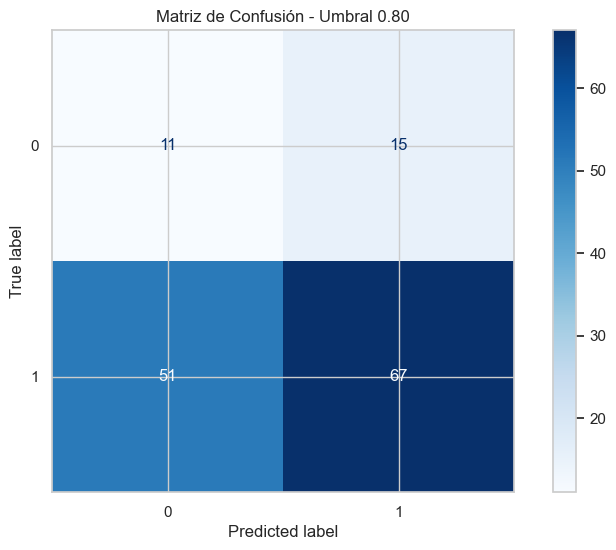

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1. Entrenamiento del modelo
scale_pos_weight = y_train_bal.value_counts()[0] / y_train_bal.value_counts()[1]

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,  # Aunque SMOTE balancea, esto ayuda si hay desbalance residual
    random_state=42
)

xgb.fit(X_train_bal, y_train_bal)

# 2. Predicción de probabilidades
y_probs = xgb.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva

# 3. Evaluación con múltiples umbrales
thresholds = np.arange(0.1, 0.9, 0.1)

for thresh in thresholds:
    y_pred_thresh = (y_probs > thresh).astype(int)
    print(f"\n🔎 Umbral: {thresh:.2f}")
    print(classification_report(y_test, y_pred_thresh, zero_division=0))

    cm = confusion_matrix(y_test, y_pred_thresh)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusión - Umbral {thresh:.2f}")
    plt.show()


Se puede ajustar el umbral, para predecir incendios que no son grandes, pero a cambio se pierde +20% de precision en la prediccion de grandes incendios, debido al desbalance extremo de los datos


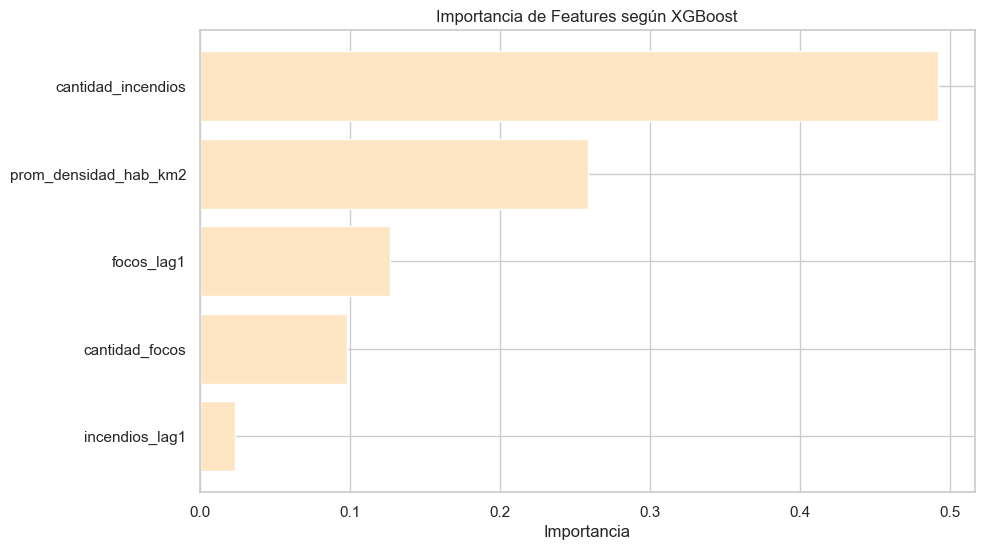

                 Feature  Importancia
1     cantidad_incendios     0.492146
2  prom_densidad_hab_km2     0.258686
3             focos_lag1     0.126777
0         cantidad_focos     0.098520
4         incendios_lag1     0.023872


In [44]:
# Si no tenés el modelo, lo creamos rápidamente:
# xgb_model = xgb.XGBClassifier(random_state=42)
# xgb_model.fit(X_train_bal, y_train_bal)

# Importancia de las características
feature_importance = xgb_model.feature_importances_

# Asociar con nombres de features
importancia_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importancia': feature_importance
}).sort_values(by='Importancia', ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'])
plt.xlabel("Importancia")
plt.title("Importancia de Features según XGBoost")
plt.gca().invert_yaxis()
plt.show()

# También imprimimos el top 10
print(importancia_df.head(10))


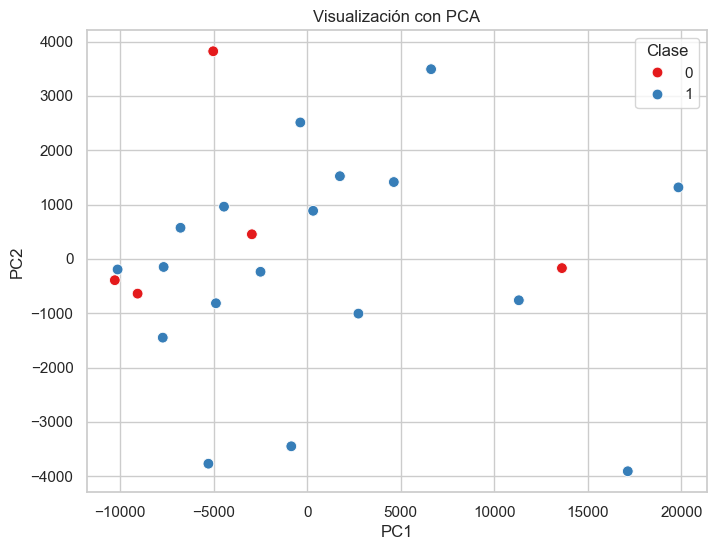

In [45]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Clase'] = y_train.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Clase', palette='Set1', s=60)
plt.title('Visualización con PCA')
plt.show()


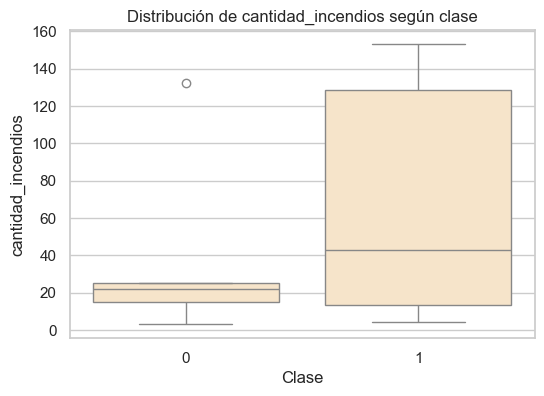

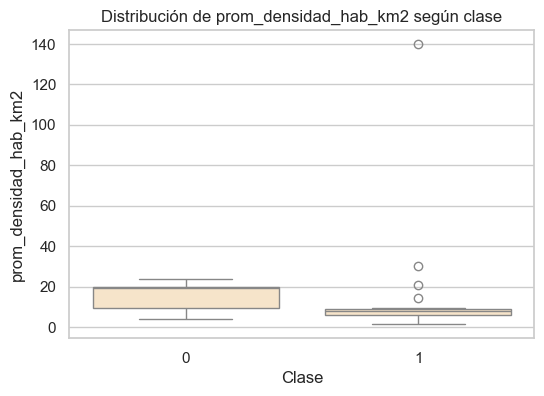

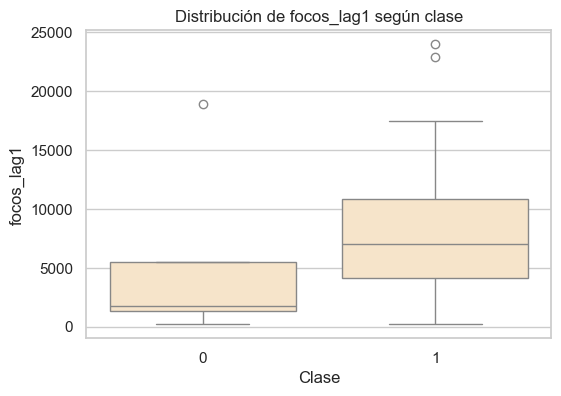

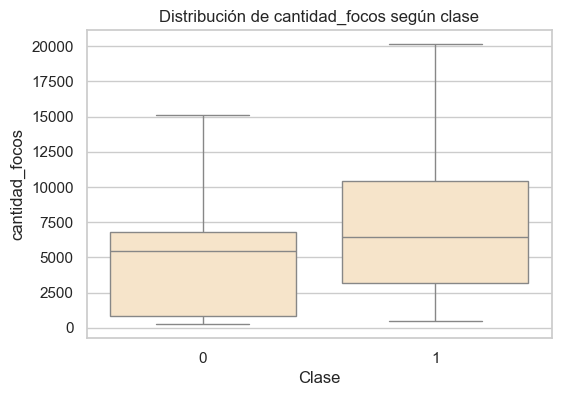

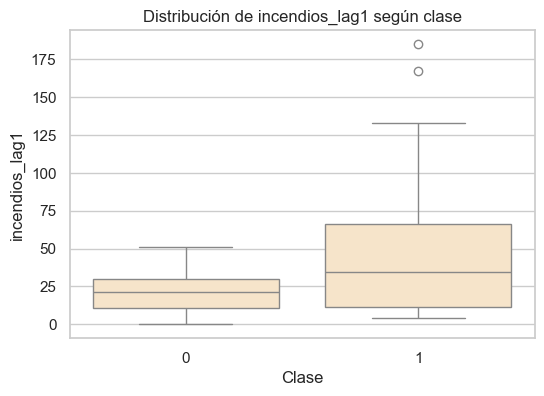

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las 5 features más importantes según el paso anterior
top_features = importancia_df['Feature'].head(5)

for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y_train, y=X_train[feature])
    plt.title(f'Distribución de {feature} según clase')
    plt.xlabel('Clase')
    plt.ylabel(feature)
    plt.show()


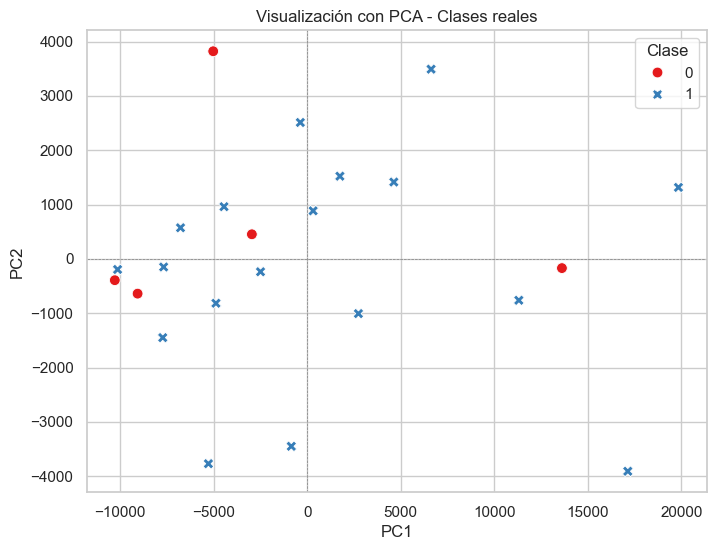

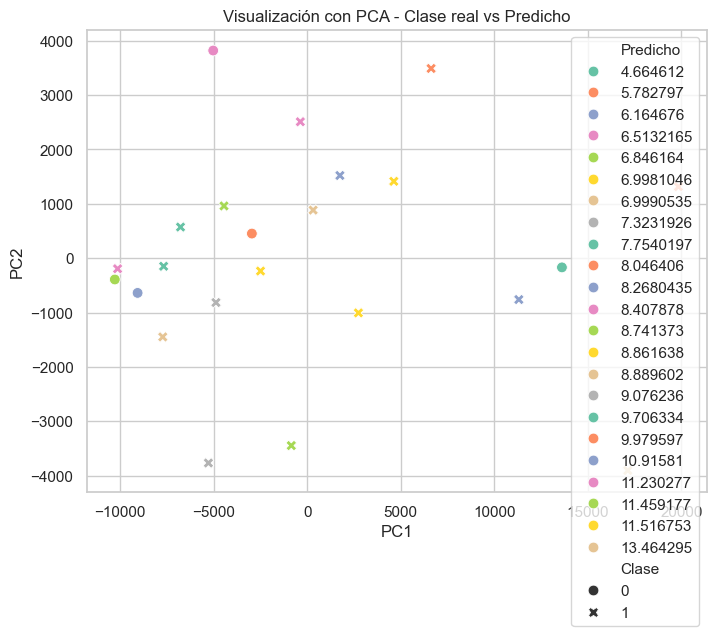

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Clase', style='Clase', palette='Set1', s=60)
plt.title('Visualización con PCA - Clases reales')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

pca_df['Predicho'] = xgb_model.predict(X_train)

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Predicho', style='Clase', palette='Set2', s=60)
plt.title('Visualización con PCA - Clase real vs Predicho')
plt.show()



In [62]:
from sklearn.metrics import roc_auc_score
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


ROC-AUC: 0.5912646675358539


* El modelo de clasifica bien, un valor de ROC-AUC 0.59 indica que el modelo apenas esta por encima del azar, a pesar de tener accuracy de 0.67, esta muy sesgado hacia la clase 1 (como se ve en el heatmap).
* Causas Posibles:
    * Features poco informativos: El modelo puede estar sobreajustando a ruido de variables menos relevantes
    * Smote generando puntos poco realistar: Smote falla, si tiene clases muy solapadas, variables no linealmente separables, el espacio generado no respeta restricciones naturales (ej: valores negativos que no tienen sentido)

### Recomendaciones de mejora

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='roc_auc')
print("ROC-AUC promedio (5 folds):", scores.mean())


C:\Users\fede4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [14:56:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\fede4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [14:56:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\fede4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [14:56:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } 

ROC-AUC promedio (5 folds): 0.5


C:\Users\fede4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [14:56:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\fede4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [14:56:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [64]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=4)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

xgb.fit(X_train_res, y_train_res)


C:\Users\fede4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [14:57:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid.fit(X_train_res, y_train_res)

print("Mejor AUC:", grid.best_score_)
print("Mejores parámetros:", grid.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejor AUC: 0.8666666666666666
Mejores parámetros: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


C:\Users\fede4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [15:03:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Con las mejoras, se encontro, que el modelo puede funcionar mejor, si le aplica otra configuracion

In [71]:
best_model = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.3,
    max_depth=3,
    n_estimators=200,
    subsample=0.7,
    random_state=42
)

best_model.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

ROC-AUC en test: 0.6383637548891786
              precision    recall  f1-score   support

           0       0.21      0.31      0.25        26
           1       0.83      0.75      0.79       118

    accuracy                           0.67       144
   macro avg       0.52      0.53      0.52       144
weighted avg       0.72      0.67      0.69       144



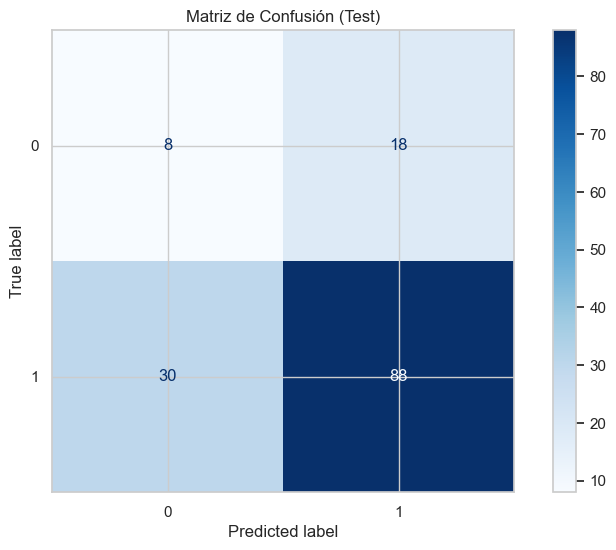

In [72]:
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("ROC-AUC en test:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Matriz de Confusión (Test)")
plt.show()


Conclusion: Si bien el modelo mejoro gracias a la optimizacion de hiperparametros, la naturaleza desbalanceada del test set limita el desempeño final. Smote solo afecta al entrenamiento, no al test, por lo que el desbalance en y_test persiste y sesga los resultados.
El modelo tiene potencial (ROC-UAC > 0.63), pero requiere trabajo sobre la calse 0 para que sea util